In [10]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
df_data = pd.read_csv("../../processed_AVP/esm_demo.csv")
df_data.shape

(86477, 321)

In [4]:
df_data["Activity"].value_counts()

Activity
0    81300
1     5177
Name: count, dtype: int64

In [6]:
df_pos = df_data[df_data["Activity"] == 1]
df_neg = df_data[df_data["Activity"] == 0]
df_neg = shuffle(df_neg, random_state=42, n_samples=len(df_pos))
df_data = pd.concat([df_pos, df_neg], axis=0)
df_data.shape

(10354, 321)

In [9]:
df_values = df_data.drop(columns=["Activity"])

pca_instance = PCA(n_components=2, random_state=42)
pca_instance.fit(df_values.values)
pca_transform = pca_instance.transform(df_values.values)

df_pca = pd.DataFrame(data=pca_transform, columns=["p0", "p1"])
df_pca["Activity"] = df_data["Activity"].values
df_pca

,p0,p1,Activity
0,-0.649902,0.135477,1
1,0.710934,-1.389932,1
2,0.939326,-0.660284,1
3,0.436346,0.204506,1
4,-0.852911,-0.204393,1
...,...,...,...
10349,-0.585056,-0.612015,0
10350,-0.674202,-0.159644,0
10351,-1.192669,0.469391,0
10352,-1.048299,-0.450404,0


<Axes: xlabel='p0', ylabel='p1'>

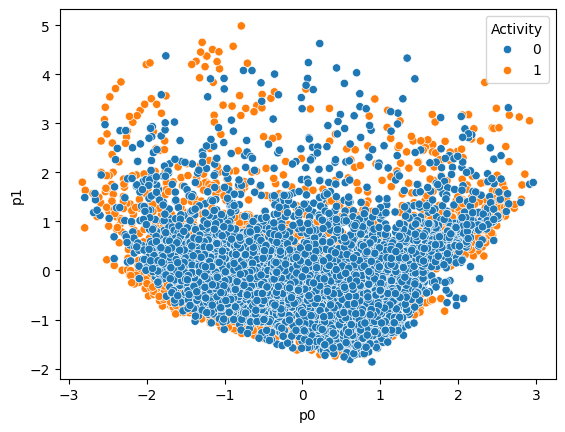

In [11]:
sns.scatterplot(data=df_pca, x="p0", y="p1", hue="Activity")

In [12]:
values_tsne = TSNE(n_components=2, perplexity=30).fit_transform(df_values.values)
df_tsne = pd.DataFrame(data=values_tsne, columns=["p0", "p1"])
df_tsne["Activity"] = df_data["Activity"].values
df_tsne

,p0,p1,Activity
0,-19.836390,85.780174,1
1,5.689395,-85.608353,1
2,46.621346,-21.444365,1
3,48.842438,15.144448,1
4,-34.793415,2.141324,1
...,...,...,...
10349,-21.659954,-29.202005,0
10350,-26.052351,18.678257,0
10351,-54.478352,30.277239,0
10352,-32.738789,-7.434037,0


<Axes: xlabel='p0', ylabel='p1'>

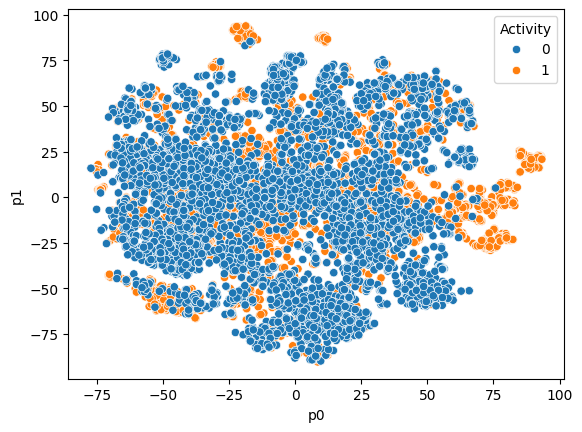

In [13]:
sns.scatterplot(data=df_tsne, x="p0", y="p1", hue="Activity")